In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper

In [2]:
#Reading the dataset
data = pd.read_csv('D:/Data Science/Dataset/Timeseries data.csv', header=0, parse_dates=[0], index_col=0, squeeze = True)
data.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [3]:
type(data)

pandas.core.series.Series

In [4]:
data.size

365

In [5]:
data.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

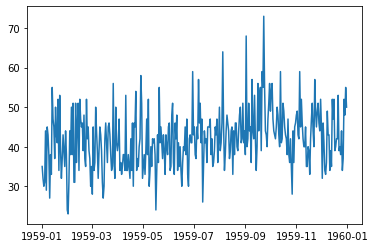

In [6]:
#Line plot of data
plt.plot(data)
plt.show()

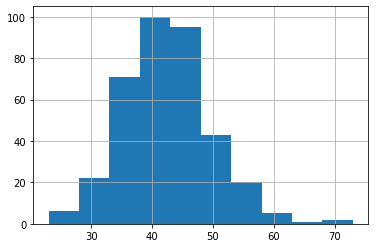

In [7]:
#plotting histogram
data.hist()
plt.show()

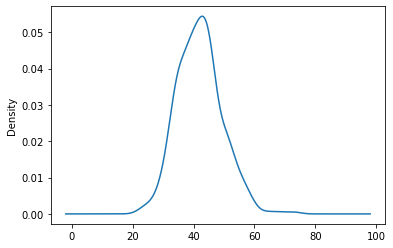

In [8]:
#plotting density plot
data.plot(kind='kde')
plt.show()

In [9]:
# Create lagged dataset i.e convert the time series dataset into a supervised machine learning problem
values = pd.DataFrame(data.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1  t+1
0   NaN   35
1  35.0   32
2  32.0   30
3  30.0   31
4  31.0   44


In [10]:
X = dataframe.values
train_size = int(len(X) * 0.7)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [11]:
# persistence model
def model_persistence(x):
    return x


In [12]:
# walk-forward validation
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 69.155


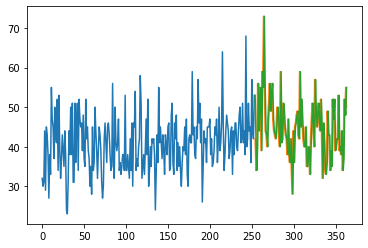

In [13]:
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

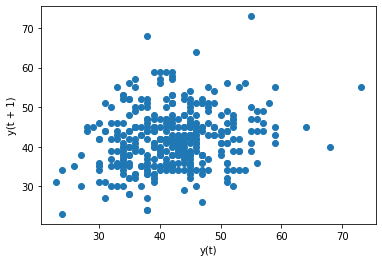

In [14]:
#Autocorrelation plot using lag plot from pandas
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

In [15]:
# Check the correlation of the supervised problem
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.217877
t+1  0.217877  1.000000


In [23]:
#Implementing autoregression 
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt
X = data.values
train, test = X[1:len(X)-1], X[len(X)-1:]
# train autoregression using previous 2 months data as input
model = AutoReg(train, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Coefficients: [29.71118127  0.18327848  0.11056566]
Test RMSE: 4.901


predicted=46.358504, expected=42.000000
predicted=45.809913, expected=34.000000
predicted=44.533053, expected=40.000000
predicted=42.008302, expected=56.000000
predicted=45.542463, expected=44.000000
predicted=45.143492, expected=53.000000
predicted=45.151975, expected=55.000000
predicted=47.509389, expected=39.000000
predicted=47.022304, expected=59.000000
predicted=51.276931, expected=55.000000
predicted=51.104843, expected=73.000000
predicted=57.072665, expected=55.000000
predicted=56.360488, expected=44.000000
predicted=52.869577, expected=43.000000
predicted=53.496737, expected=40.000000
predicted=51.013196, expected=47.000000
predicted=50.626960, expected=51.000000
predicted=47.570657, expected=56.000000
predicted=47.983872, expected=49.000000
predicted=47.739450, expected=54.000000
predicted=49.403299, expected=56.000000
predicted=52.510640, expected=47.000000
predicted=51.828371, expected=44.000000
predicted=49.956130, expected=43.000000
predicted=47.918256, expected=42.000000


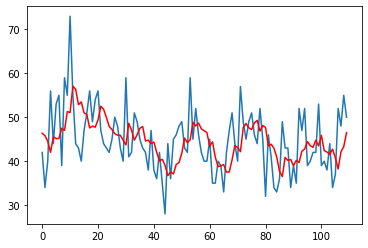

In [26]:
##Implementing ARIMA 
from statsmodels.tsa.arima.model import ARIMA

# split into train and test sets
X = data.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()